In [5]:
from nn.Value import Value
from utils.visualize_value import visualize
import matplotlib.pyplot as plt
%matplotlib inline


a = Value(2.0, expression='a')
b = Value(3.0, expression='b')
c = a + b
d = a * b + b ** a

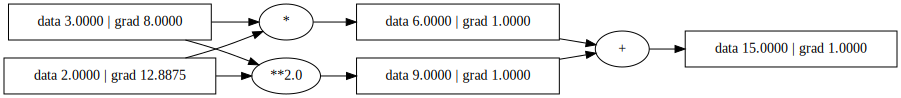

In [6]:
d.backward()
visualize(d)

In [ ]:
a = Value(2.0, expression='a')
b = a + a

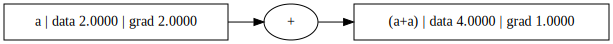

In [4]:
b.backward()
visualize(b)

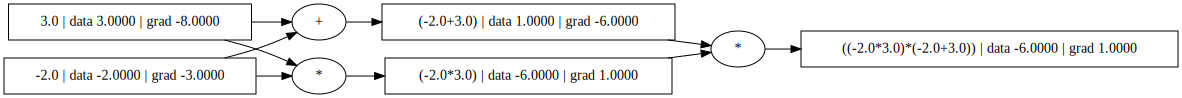

In [5]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()
visualize(f)

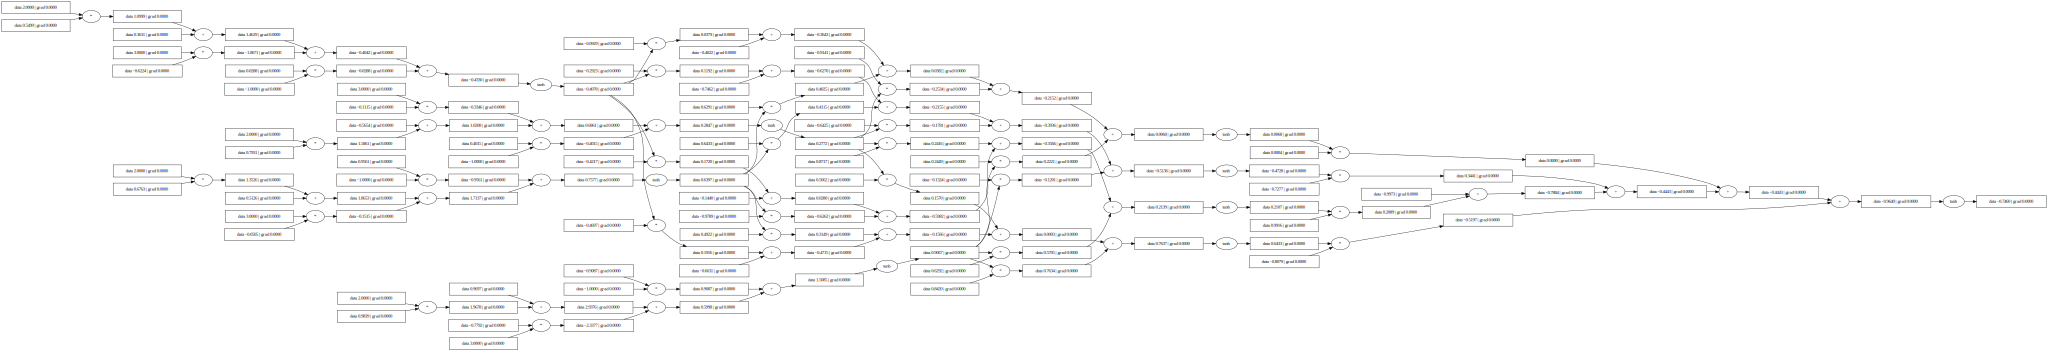

In [8]:
from nn.Models.MLP import MLP
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
visualize(n(x))

In [4]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
y_pred = [n(x) for x in xs]

In [7]:
len(n.parameters())

41

In [8]:
for k in range(20):
    ypred = [n(x) for x in xs]
    loss = sum([(yout - Value(ygt))**2 for ygt, yout in zip(ys, ypred)])

    loss.backward()
    for p in n.parameters():
        p.data += -0.01 * p.grad

In [10]:
ypred

[Value(data=0.9995318991008965, grad=-0.0009362017982070814),
 Value(data=-0.9987930197974607, grad=0.0024139604050785746),
 Value(data=-0.9986235389233163, grad=0.00275292215336731),
 Value(data=0.9989502713224143, grad=-0.0020994573551713636)]